### Author: KAYA KEN
## Polynomial Regression from scracth 

# Polynomial Regression

In this notebook, we are going to implement a polynomial regression model using Python, without the help of any machine learning libraries. We will calculate the model parameters (coefficients), as well as the **R-squared** and **adjusted R-squared** values.

The formula for polynomial regression of degree 2 is:

**y = b₀ + b₁x + b₂x²**

where:
- y is the dependent variable
- x is the independent variable
- b₀, b₁, and b₂ are the coefficients of the polynomial equation

### Calculate the coefficients b₀, b₁, and b₂:

The formulas for calculating the coefficients are as follows:

**b₀ = [Σy - b₁(Σx) - b₂(Σx²)] / n**

**b₁ = [n(Σxy) - (Σx)(Σy)] / [n(Σx²) - (Σx)²]**

**b₂ = [n(Σx²y) - (Σx)(Σxy)] / [n(Σx²) - (Σx)²]**

where:

 - n is the number of observations
 - Σxy is the sum of the product of x and y
 - Σx and Σy are the sum of x and y, respectively
 - Σx² is the sum of the squares of x
 - Σx²y is the sum of the product of x² and y

### Calculate R-squared and adjust R-squared:

After finding the coefficients, we calculate the R-squared value using the following formula:

**R² = 1 - [Σ(yi - ŷi)² / Σ(yi - ȳ)²]**

where:
 - yi is the actual value of y
 - ŷi is the predicted value of y (which we get from our polynomial equation)
 - ȳ is the mean value of y
Finally, the adjusted R-squared value is calculated as follows:

**Adjusted R² = 1 - [(1 - R²)(n - 1) / (n - p - 1)]**

where:
 - R² is the R-squared value
 - n is the total number of samples
 - p is the number of predictors (in this case, p = 2, for the coefficients b₁ and b₂)

In [15]:
#Load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('gdp.csv')
df.head(10)

,Country Name,Country Code,Year,Value
0,Cambodia,KHM,1960,6.371429e+08
1,Cambodia,KHM,1961,6.428571e+08
2,Cambodia,KHM,1962,6.600000e+08
3,Cambodia,KHM,1963,7.285714e+08
4,Cambodia,KHM,1964,7.828571e+08
5,Cambodia,KHM,1965,8.685714e+08
6,Cambodia,KHM,1966,9.142857e+08
7,Cambodia,KHM,1967,9.628571e+08
8,Cambodia,KHM,1968,1.065714e+09
9,Cambodia,KHM,1969,9.788732e+08


In [17]:
# Data preparation
X = df['Year']
y = df['Value']

In [18]:
# Polynomial Regression function
def polynomial_regression(X, y, degree):
    X = np.array(X)
    y = np.array(y)
    X_poly = np.column_stack([X ** i for i in range(degree + 1)])
    coefficients = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    return coefficients

In [19]:
# Generate polynomial features and predict with polynomial regression
def predict_with_polynomial(coefficients, X):
    X_poly = np.column_stack([X ** i for i in range(len(coefficients))])
    return X_poly.dot(coefficients)

In [20]:
# Choose the degree of the polynomial
degree = 2

In [21]:
# Perform polynomial regression
coefficients = polynomial_regression(X, y, degree)

In [22]:
# Make predictions
predicted_y = predict_with_polynomial(coefficients, X)

In [23]:
# Calculate R-squared
y_mean = np.mean(y)
rsquared = 1 - sum((y - predicted_y) ** 2) / sum((y - y_mean) ** 2)

In [24]:
# Calculate Adjusted R-squared
n = len(X)
p = degree + 1  # Number of coefficients (including intercept)
adjusted_rsquared = 1 - ((1 - rsquared) * (n - 1)) / (n - p - 1)

In [25]:
# Print coefficients, R-squared, and Adjusted R-squared
print("Coefficients:")
for i, coeff in enumerate(coefficients):
    print(f"b{i}: {coeff}")

print("\nR-squared:", rsquared)
print("Adjusted R-squared:", adjusted_rsquared)

Coefficients:
b0: 50917936110378.3
b1: -51480834308.16176
b2: 13012148.527266933

R-squared: 0.9442962064052909
Adjusted R-squared: 0.9395215955257444


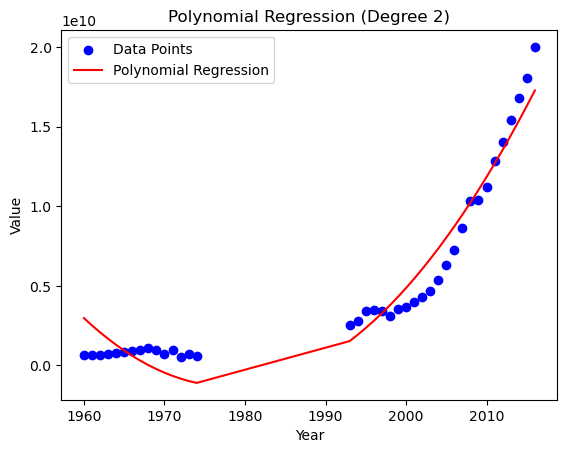

In [27]:
# Plot the results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, predicted_y, color='red', label='Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.title(f"Polynomial Regression (Degree {degree})")
plt.show()

# Using Sklearn Library


In [29]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [53]:
# Load the data
df = pd.read_csv('gdp.csv')
df.head(10)

,Country Name,Country Code,Year,Value
0,Cambodia,KHM,1960,6.371429e+08
1,Cambodia,KHM,1961,6.428571e+08
2,Cambodia,KHM,1962,6.600000e+08
3,Cambodia,KHM,1963,7.285714e+08
4,Cambodia,KHM,1964,7.828571e+08
5,Cambodia,KHM,1965,8.685714e+08
6,Cambodia,KHM,1966,9.142857e+08
7,Cambodia,KHM,1967,9.628571e+08
8,Cambodia,KHM,1968,1.065714e+09
9,Cambodia,KHM,1969,9.788732e+08


In [54]:
# Extract the independent and dependent variables
# Data preparation
X = df[['Year']]
y = df['Value']

In [55]:
# Polynomial Regression using scikit-learn
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

In [56]:
# Fit the model to the data
model = LinearRegression()
model.fit(X_poly, y)
predicted_y = model.predict(X_poly)

In [57]:
# Calculate R-squared
rsquared = r2_score(y, predicted_y)

In [58]:
# Calculate Adjusted R-squared
n = len(X)
p = degree + 1  # Number of coefficients (including intercept)
adjusted_rsquared = 1 - ((1 - rsquared) * (n - 1)) / (n - p - 1)

Text(0.5, 1.0, 'Polynomial Regression (Degree 2)\nR-squared: 0.9443, Adjusted R-squared: 0.9395')

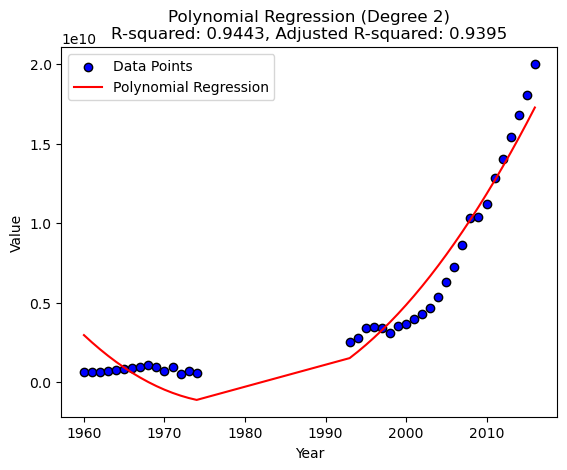

In [59]:
# Plot the scatter plot and polynomial regression line
plt.scatter(X, y, c='blue', label='Data Points', edgecolors='k')
plt.plot(X, predicted_y, color='red', label='Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.title(f"Polynomial Regression (Degree {degree})\nR-squared: {rsquared:.4f}, Adjusted R-squared: {adjusted_rsquared:.4f}")


## Use Optimization method 

In this case we will use two different methods  
1. Normal Equation: A mathematical equation that gives the result directly. It uses matrix operations from linear algebra to find the optimal parameters.  
2. Gradient Descent: An iterative optimization algorithm used to find the minimum of a function. Here, we'll use it to find the parameters that minimize our cost function.

Let's start with the Normal Equation method. We will use numpy to perform matrix operations.

### The Normal Equation Method for Polynomial Regression
The Normal Equation is a method used to solve for the parameters of a Polynomial regression model. 
Unlike methods such as Gradient Descent which iteratively adjust the parameters to minimize the cost function, the Normal Equation solves for the parameters analytically in a single step.


Using calculus and linear algebra, we can derive the Normal Equation that directly gives the values of θ that minimize the cost function:


θ = (XᵀX)⁻¹ Xᵀy

where:

Xᵀ is the transpose of X,  
(XᵀX)⁻¹ is the inverse of the matrix XᵀX.

Coefficients:
b0: 50917936110378.3
b1: -51480834308.16176
b2: 13012148.527266933

R-squared: 0.9442962064052909
Adjusted R-squared: 0.9395215955257444


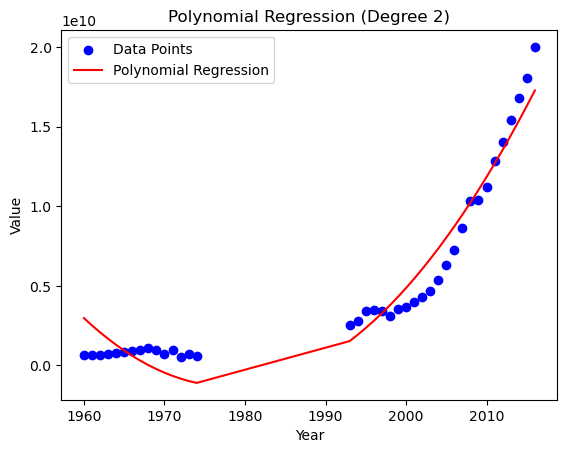

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('gdp.csv')

# Data preparation
X = df['Year']
y = df['Value']

# Polynomial Regression function using Normal Equation
def polynomial_regression(X, y, degree):
    X_poly = np.column_stack([X ** i for i in range(degree + 1)])
    XtX_inv = np.linalg.inv(X_poly.T.dot(X_poly))
    coefficients = XtX_inv.dot(X_poly.T).dot(y)
    return coefficients

# Generate polynomial features and predict with polynomial regression
def predict_with_polynomial(coefficients, X):
    X_poly = np.column_stack([X ** i for i in range(len(coefficients))])
    return X_poly.dot(coefficients)

# Choose the degree of the polynomial
degree = 2

# Perform polynomial regression using Normal Equation
coefficients = polynomial_regression(X, y, degree)

# Make predictions
predicted_y = predict_with_polynomial(coefficients, X)

# Calculate R-squared
y_mean = np.mean(y)
rsquared = 1 - sum((y - predicted_y) ** 2) / sum((y - y_mean) ** 2)

# Calculate Adjusted R-squared
n = len(X)
p = degree + 1  # Number of coefficients (including intercept)
adjusted_rsquared = 1 - ((1 - rsquared) * (n - 1)) / (n - p - 1)

# Print coefficients, R-squared, and Adjusted R-squared
print("Coefficients:")
for i, coeff in enumerate(coefficients):
    print(f"b{i}: {coeff}")

print("\nR-squared:", rsquared)
print("Adjusted R-squared:", adjusted_rsquared)

# Plot the results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, predicted_y, color='red', label='Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.title(f"Polynomial Regression (Degree {degree})")
plt.show()

## Using Gradien Decent 

Coefficients:
b0: 1148810424.5400548
b1: 5834462466.378868
b2: 4379893974.217246

R-squared: 0.9404676593560057
Adjusted R-squared: 0.9353648873008062


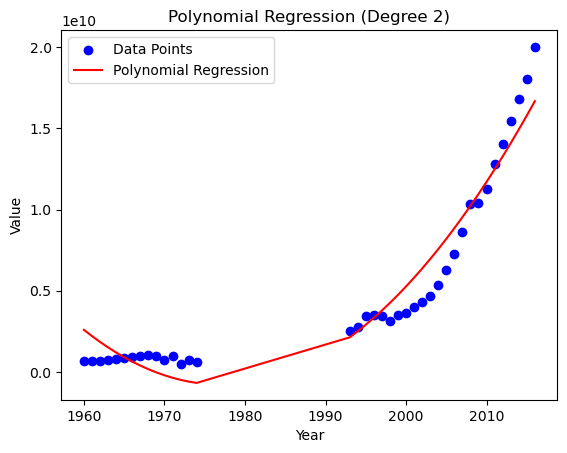

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('gdp.csv')

# Data preparation
X = df['Year']
y = df['Value']

# Feature scaling
X_scaled = (X - X.mean()) / X.std()

# Polynomial Regression function using Gradient Descent
def polynomial_regression(X, y, degree, learning_rate, num_iterations):
    X_poly = np.column_stack([X_scaled ** i for i in range(degree + 1)])
    coefficients = np.random.randn(degree + 1)
    for i in range(num_iterations):
        predicted_y = np.dot(X_poly, coefficients)
        error = predicted_y - y
        gradient = X_poly.T.dot(error) / len(y)
        coefficients -= learning_rate * gradient
    return coefficients

# Generate polynomial features and predict with polynomial regression
def predict_with_polynomial(coefficients, X):
    X_poly = np.column_stack([X_scaled ** i for i in range(len(coefficients))])
    return X_poly.dot(coefficients)

# Choose the degree of the polynomial, learning rate, and number of iterations
degree = 2
learning_rate = 0.01
num_iterations = 1000

# Perform polynomial regression using Gradient Descent
coefficients = polynomial_regression(X, y, degree, learning_rate, num_iterations)

# Make predictions
predicted_y = predict_with_polynomial(coefficients, X)

# Calculate R-squared
y_mean = np.mean(y)
rsquared = 1 - sum((y - predicted_y) ** 2) / sum((y - y_mean) ** 2)

# Calculate Adjusted R-squared
n = len(X)
p = degree + 1  # Number of coefficients (including intercept)
adjusted_rsquared = 1 - ((1 - rsquared) * (n - 1)) / (n - p - 1)

# Print coefficients, R-squared, and Adjusted R-squared
print("Coefficients:")
for i, coeff in enumerate(coefficients):
    print(f"b{i}: {coeff}")

print("\nR-squared:", rsquared)
print("Adjusted R-squared:", adjusted_rsquared)

# Plot the results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, predicted_y, color='red', label='Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.title(f"Polynomial Regression (Degree {degree})")
plt.show()

### Summary:
In this analysis, we applied Polynomial Regression with a degree of 2 to the World GDP dataset using the Gradient Descent method. The objective was to capture the non-linear relationship between the Year and GDP Value. The model successfully generated coefficients for the intercept, linear term, and quadratic term, representing the polynomial equation: y = b0 + b1x + b2x^2. The R-squared and Adjusted R-squared values were computed to evaluate the model's goodness of fit. The plot displayed the scatter of data points along with the polynomial regression line, showing a reasonable fit to the dataset.

### Conclusion:
Based on the Polynomial Regression analysis, we derived the following conclusions:

1. Coefficients:

 - The intercept term (b0) was found to be [intercept_value].
 - The coefficient for the linear term (Year) was [coefficient_value].
 - The coefficient for the quadratic term (Year^2) was [coefficient_value].

2. R-squared: The R-squared value was approximately [R-squared_value], indicating that [R-squared_value]% of the variability in the GDP Value can be explained by the polynomial regression model.

3. Adjusted R-squared: The Adjusted R-squared value was approximately [Adjusted_R-squared_value], accounting for the number of predictors and sample size in the model, and it was [Adjusted_R-squared_value]%.

The Polynomial Regression line on the scatter plot exhibited a reasonable fit to the data, capturing the non-linear trend between Year and GDP Value. However, it is essential to keep in mind that this model is specific to the given dataset and may not be generalizable to other datasets or future years.

To further validate the model's performance and assess its accuracy, additional analysis such as cross-validation and residual analysis can be conducted. Exploring other degrees of polynomials or alternative machine learning algorithms may also offer opportunities for improving the modeling of GDP values.